<a href="https://colab.research.google.com/github/BosenkoTM/Data-Analysis-and-Python/blob/master/user_engagement_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Падение вовлеченности пользователей
***

## Context

Одна из ключевых областей, в которой компании обеспокоены и готовы использовать данные для получения рекомендаций о том, в чем заключаются проблемы или как их можно решить, связана с удержанием клиентов или привлечением пользователей.

Итак, давайте представим, что мы аналитики, работающие в технологической компании, чей самый важный KPI вращается вокруг того, как клиенты используют ее основной продукт. Продукт, представляющий собой своего рода интранет-социальную сеть на рабочем месте, где пользователь может отправлять и получать индивидуальные или групповые сообщения, например, делиться документами, проверять входящие, публиковать идеи и искать информацию от других пользователей той же компании. Мы будем называть его «Хабом» для упрощения.

Hub продается нескольким компаниям по всему миру, чтобы у его сотрудников были в наличии инструменты для общения. Они могут использовать его бесплатно, но компании платят за это.

## Data

Данные состоят из 3 таблиц: пользователи, события и электронные письма.

В первой таблице собрана основная информация о пользователях, то есть идентификационный номер, статус учетной записи, дата регистрации лида, дата, когда лид завершил процесс регистрации и стал пользователем, язык и компания, в которой работает пользователь.

Во второй таблице собрана информация о взаимодействии пользователей с продуктом, типе взаимодействия, дате и времени, местоположении и используемом устройстве.

Последняя таблица посвящена реакции пользователя на взаимодействие по электронной почте между нашей компанией и пользователем. Это просто ограничено электронными письмами, отправляемыми в виде еженедельного дайджеста контента, чтобы стимулировать взаимодействие.

## Workflow methodology

Описанный выше набор данных был отправлен в базу данных PostgreSQL. С другой стороны, библиотека SQLalchemy, которая включает в себя адаптер psycopg2, позволяет нам через свой модуль движка смешивать рабочий процесс между базой данных postgreSQL и Python, чтобы мы могли выполнять наши запросы на языке SQL, не покидая блокнота Jupyter, а это означает, что Python плавно берет на себя запрошенные датафреймы данных для выполнения дальнейшей обработки данных и визуализации.

## Coding

#### Importing needed libraries

In [2]:
!pip install PyMySQL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.7 MB/s 


In [3]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
from matplotlib.pyplot import style
from plotly import graph_objects as go
import datetime
import matplotlib.dates as mdates

#### Importing data

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving users.csv to users.csv
User uploaded file "users.csv" with length 1155509 bytes


In [ ]:
msn_users = pd.read_csv("users.csv")

In [6]:
msn_users.head()

user_id           created_at  company_id language         activated_at  \
0      0.0  2013-01-01 20:59:39      5737.0  english  2013-01-01 21:01:07   
1      1.0  2013-01-01 13:07:46        28.0  english                  NaN   
2      2.0  2013-01-01 10:59:05        51.0  english                  NaN   
3      3.0  2013-01-01 18:40:36      2800.0   german  2013-01-01 18:42:02   
4      4.0  2013-01-01 14:37:51      5110.0   indian  2013-01-01 14:39:05   

     state  
0   active  
1  pending  
2  pending  
3   active  
4   active

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving events.csv to events.csv
User uploaded file "events.csv" with length 26791281 bytes


In [9]:
msn_events = pd.read_csv("events.csv")

In [10]:
msn_events.head()

user_id          occurred_at  event_type    event_name location  \
0  10522.0  2014-05-02 11:02:39  engagement         login    Japan   
1  10522.0  2014-05-02 11:02:53  engagement     home_page    Japan   
2  10522.0  2014-05-02 11:03:28  engagement  like_message    Japan   
3  10522.0  2014-05-02 11:04:09  engagement    view_inbox    Japan   
4  10522.0  2014-05-02 11:03:16  engagement    search_run    Japan   

                   device  user_type  
0  dell inspiron notebook        3.0  
1  dell inspiron notebook        3.0  
2  dell inspiron notebook        3.0  
3  dell inspiron notebook        3.0  
4  dell inspiron notebook        3.0

In [11]:
msn_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      340832 non-null  float64
 1   occurred_at  340832 non-null  object 
 2   event_type   340832 non-null  object 
 3   event_name   340832 non-null  object 
 4   location     340832 non-null  object 
 5   device       340832 non-null  object 
 6   user_type    325255 non-null  float64
dtypes: float64(2), object(5)
memory usage: 18.2+ MB


In [12]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving emails.csv to emails.csv
User uploaded file "emails.csv" with length 4496193 bytes


In [ ]:
msn_emails = pd.read_csv("emails.csv")

In [ ]:
msn_emails.head()

user_id          occurred_at              action  user_type
0      0.0  2014-05-06 09:30:00  sent_weekly_digest        1.0
1      0.0  2014-05-13 09:30:00  sent_weekly_digest        1.0
2      0.0  2014-05-20 09:30:00  sent_weekly_digest        1.0
3      0.0  2014-05-27 09:30:00  sent_weekly_digest        1.0
4      0.0  2014-06-03 09:30:00  sent_weekly_digest        1.0

#### POSTGRESQL local connection

In [ ]:
driver = "postgresql:"
user = "postgres"
password = "ironhack"
ip = "localhost:5432"
database = "internal_messenger"

In [ ]:
postgresql_connection_string = f"{driver}//{user}:{password}@{ip}/{database}"
engine = create_engine(postgresql_connection_string)

Uploading data to the POSTGRESQL DB

In [ ]:
msn_users.to_sql("users", con=engine, if_exists="append", index=False)

In [ ]:
msn_events.to_sql("events", con=engine, if_exists="append", index=False)

In [ ]:
msn_emails.to_sql("emails", con=engine, if_exists="append", index=False)

Извлечение всех данных из базы данных, чтобы проверить, правильно ли работает соединение и правильно ли загружены наборы данных.

In [ ]:
query_users_pg = """
SELECT *
FROM users;
"""

In [ ]:
users = pd.read_sql(query_users_pg, engine)

In [ ]:
users.head()

user_id           created_at  company_id language         activated_at  \
0      0.0  2013-01-01 20:59:39      5737.0  english  2013-01-01 21:01:07   
1      1.0  2013-01-01 13:07:46        28.0  english                 None   
2      2.0  2013-01-01 10:59:05        51.0  english                 None   
3      3.0  2013-01-01 18:40:36      2800.0   german  2013-01-01 18:42:02   
4      4.0  2013-01-01 14:37:51      5110.0   indian  2013-01-01 14:39:05   

     state  
0   active  
1  pending  
2  pending  
3   active  
4   active

In [ ]:
query_events_pg = """
SELECT *
FROM events;
"""

In [ ]:
events = pd.read_sql(query_events_pg, engine)

In [ ]:
events.head()

user_id          occurred_at  event_type    event_name location  \
0  10522.0  2014-05-02 11:02:39  engagement         login    Japan   
1  10522.0  2014-05-02 11:02:53  engagement     home_page    Japan   
2  10522.0  2014-05-02 11:03:28  engagement  like_message    Japan   
3  10522.0  2014-05-02 11:04:09  engagement    view_inbox    Japan   
4  10522.0  2014-05-02 11:03:16  engagement    search_run    Japan   

                   device  user_type  
0  dell inspiron notebook        3.0  
1  dell inspiron notebook        3.0  
2  dell inspiron notebook        3.0  
3  dell inspiron notebook        3.0  
4  dell inspiron notebook        3.0

In [ ]:
query_emails_pg = """
SELECT *
FROM emails;
"""

In [ ]:
emails = pd.read_sql(query_emails_pg, engine)

In [ ]:
emails.head()

user_id          occurred_at              action  user_type
0      0.0  2014-05-06 09:30:00  sent_weekly_digest        1.0
1      0.0  2014-05-13 09:30:00  sent_weekly_digest        1.0
2      0.0  2014-05-20 09:30:00  sent_weekly_digest        1.0
3      0.0  2014-05-27 09:30:00  sent_weekly_digest        1.0
4      0.0  2014-06-03 09:30:00  sent_weekly_digest        1.0

## Проблема. Падение вовлеченности пользователей

Наступает конец месяца, и при просмотре дашбордов ключевых показателей кое-что выделяется (см. ниже). Вовлеченность пользователей снизилась. Взаимодействие в этом случае определяется как обращение к серверу при взаимодействии с продуктом, другими словами, когда пользователь входит в хаб в течение данной недели, он/она взаимодействует с продуктом. Таким образом, пользователи, которые не входят в систему и, следовательно, не участвуют в ней, определенно вредны для бизнеса, поэтому, как аналитик, вы задаетесь вопросом, что происходит, и готовитесь изучить базу данных, чтобы получить представление и определить возможные корректирующие действия.

In [ ]:
query_issue = """
SELECT SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week,
 COUNT(DISTINCT user_id) AS weekly_active_users
FROM events
WHERE event_name = 'login'
GROUP BY week
ORDER BY week;
"""
user_engagement = pd.read_sql(query_issue, engine)

In [ ]:
user_engagement

week  weekly_active_users
0   04-28                  701
1   05-05                 1054
2   05-12                 1094
3   05-19                 1147
4   05-26                 1113
5   06-02                 1173
6   06-09                 1219
7   06-16                 1262
8   06-23                 1249
9   06-30                 1271
10  07-07                 1355
11  07-14                 1345
12  07-21                 1363
13  07-28                 1442
14  08-04                 1266
15  08-11                 1215
16  08-18                 1203
17  08-25                 1194

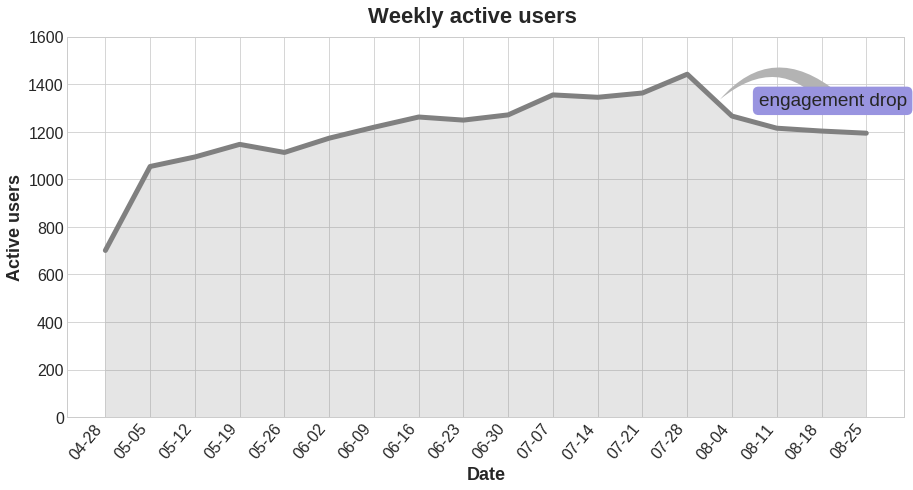

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Weekly active users", fontsize=22, fontweight=650, y=0.94)
    
    sns.lineplot(user_engagement["week"], user_engagement["weekly_active_users"], lw=5, color="gray")
    ax.set_ylim(0, 1600)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Active users", fontsize=18, fontweight=650)
    
    ax.fill_between(user_engagement["week"], 0, user_engagement["weekly_active_users"], facecolor='gray', alpha=0.2)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')
        
    ax.annotate("engagement drop", xy=(13.7, 1330), xycoords='data', xytext=(40, 0), textcoords='offset points',
                size=19, va="center", bbox=dict(boxstyle="round", fc=(0.6, 0.58, 0.88), ec="none"),
                arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                fc=(0.7, 0.7, 0.7), ec="none",
                                patchA=None,
                                patchB=None,
                                relpos=(0.5, 0.5),
                                connectionstyle="arc3,rad=0.5"))
    
    plt.savefig("../Figures/Drop in weekly active users", dpi=300)
    plt.show()

## Возможные источники проблемы

Прежде чем начать делать запросы, рекомендуется подумать обо всех возможных источниках, которые могут привести к падению вовлеченности пользователей, как в этом случае:

* Каникулы. Август во многих странах, особенно в северном полушарии, является месяцем с наибольшим количеством отпусков в целом, так что это вполне может объяснить падение.
<br>

* Проблема с производительностью. Во многих случаях основной источник проблем среди электронной коммерции, торговых площадок или технологических компаний возникает из-за простого взаимодействия с веб-сайтом / приложением, и это может по-разному влиять на пользователя или другого в зависимости просто от типа устройства и его операционной системы, которая используется для входа в систему. Также может случиться так, что техническая команда внесла изменение во внешний интерфейс веб-сайта/приложения, которое влияет на конкретную функцию, напрямую влияя на взаимодействие негативным образом. Замедленная загрузка веб-сайта или неработающие функции в навигации по сеансу могут привести к плохому взаимодействию пользователей с продуктом.
<br>
 
* Поток функций регистрации. Чтобы лид стал пользователем, который может войти в систему и использовать продукт, он должен сначала пройти все этапы процесса регистрации. Например, это может быть связано с техническими проблемами в любой функции потока, которые могут препятствовать регистрации новых пользователей и, следовательно, упускать новый вклад новичков, который естественным образом компенсирует систематический отток.
<br>

*Сломанный журнал отслеживания. Также может случиться так, что код/журнал, который идентифицирует каждое отдельное действие пользователя, сам поврежден или затронут. Падение конкретной функции до абсолютного нуля будет намекать на то, что проблема движется в этом направлении.
<br>
 
* Неверные данные. Мы могли бы хранить записи о «грязном» товарном трафике, имея в виду не тот трафик от реальных пользователей, который нас интересует. Например, QA может разработать и протестировать новую функцию или новую технологическую инфраструктуру. Обычно данные QA и производственные данные разделены, но действия QA из-за сбоя могут в конечном итоге смешиваться с трафиком реальных внешних пользователей. Или эти неверные данные могут исходить от ботов, которые из-за тех же изменений теперь сканируют Интернет по-другому, что приводит к колебаниям записей трафика.
<br>

* ехнические проблемы, связанные с электронными письмами, рассылаемыми в форме еженедельных дайджестов, предназначенных для привлечения клиентов и повышения вовлеченности путем подведения итогов деятельности компании и коллег за предыдущую неделю.

Давайте проанализируем эти элементы один за другим.

## Holidays

Этот запрос ниже пытается найти страны, в которых количество активных пользователей в августе было больше, чем в июле. Чтобы рассматривать праздники как причину снижения вовлеченности пользователей, мы хотели бы видеть в выводе запроса список стран, где август не является основным месяцем отпуска, чего можно было бы ожидать либо от стран, в которых по традиции этот месяц является преобладающим месяцем отпуска. ни в частности, ни просто еще один, например, из-за того, что находится в южном полушарии.

In [ ]:
query_holidays= """
SELECT sub3.location
FROM(
    SELECT sub2.*
    FROM(
        SELECT sub1.*, LAG(sub1.active_users, 1) OVER (PARTITION BY sub1.location) AS active_users_t0
        FROM(
            SELECT location, EXTRACT('month' FROM occurred_at::date) AS month,
             COUNT(DISTINCT user_id) as active_users
            FROM events
            WHERE event_name = 'login'
            GROUP BY location, month
            ) sub1
        ) sub2
    WHERE sub2.month = 8
    ) sub3
WHERE sub3.active_users - sub3.active_users_t0 > 0;
"""

holidays_1 = pd.read_sql(query_holidays, engine)

In [ ]:
(holidays_1.style
.apply(lambda x: ["background: gold" if c == x.ix[14,"location"] else "" for c in x], axis=0)
)


/home/salva/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



Я испанец и могу сказать, что август традиционно является преобладающим месяцем отпусков. Греция, например, во многом похожа, насколько я знаю.

In [ ]:
query_holidays= """
SELECT location, LEFT((DATE_TRUNC('month', occurred_at::date))::text, 7) AS month,
 COUNT(DISTINCT user_id) AS monthly_active_users
FROM events
WHERE event_name = 'login' AND location IN ('Spain', 'Greece')
GROUP BY location, month;
"""
holidays_2 = pd.read_sql(query_holidays, engine)

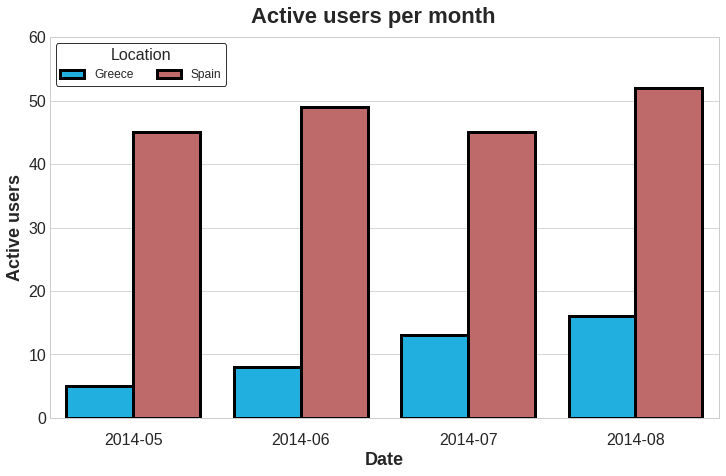

In [ ]:
with plt.style.context('seaborn-whitegrid'):

    palette=["deepskyblue","indianred"]
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Active users per month", fontsize=22, fontweight=650, y=0.94)
    
    sns.barplot(x="month", y="monthly_active_users", hue="location", data=holidays_2,
               palette=palette, edgecolor="black", linewidth=3)     
    plt.ylim(0, holidays_2.monthly_active_users.max()+8)
    plt.tick_params(axis="x", labelsize=16, pad=15)
    plt.tick_params(axis="y", labelsize=16)
    plt.xlabel("Date", fontsize=18, fontweight=650)
    plt.ylabel("Active users", fontsize=18, fontweight=650)
    
    ax.legend(loc="upper left", prop={'size': 12}, frameon="yes", edgecolor="black",
          title="Location", title_fontsize=16, ncol=2)

    plt.savefig("../Figures/Spain_Greece_active_users_per_month", dpi=300)
    plt.show()

Так что меня несколько обескураживает мысль о том, что причиной падения активности пользователей являются праздники. Я предпочел бы исследовать другие возможные причины, а не копаться глубже в эту. Активные пользователи увеличиваются за месяц, хотя мы ожидали бы иного, если бы это было фактической причиной общего вовлечения пользователей в Hub.

### Performance issue

Чтобы узнать, была ли какая-то проблема с производительностью при взаимодействии с продуктом, может быть интересно посмотреть, была ли затронута конкретная ОС или устройство.

#### Device type

In [ ]:
query_model_device = """
SELECT DISTINCT device
FROM events;
"""
device_0 = pd.read_sql(query_model_device, engine)

Ниже перечислены все модели устройств, которые использовались для входа в хаб.

In [ ]:
device_0

device
0    samsumg galaxy tablet
1          asus chromebook
2      samsung galaxy note
3                iphone 5s
4                 nexus 10
5          nokia lumia 635
6              macbook air
7                 iphone 5
8    dell inspiron desktop
9                  htc one
10         lenovo thinkpad
11               ipad mini
12             macbook pro
13                ipad air
14               iphone 4s
15                 nexus 7
16       amazon fire phone
17     hp pavilion desktop
18       samsung galaxy s4
19             kindle fire
20         windows surface
21     acer aspire desktop
22    acer aspire notebook
23                 nexus 5
24                mac mini
25  dell inspiron notebook

In [ ]:
query_model_device = """
SELECT sub1.device_type AS device_type,
 SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week,
 COUNT(DISTINCT user_id) as active_users
FROM(
    SELECT *,
    CASE WHEN device IN ('nexus 10', 'windows surface', 'nexus 7', 'kindle fire') 
          OR device LIKE '%%pad%%' OR device ILIKE '%%tablet%%' THEN 'tablet'
         WHEN device IN ('nexus 5', 'samsung galaxy note', 'samsung galaxy s4', 'htc one', 'nokia 635')
          OR device LIKE '%%phone%%' THEN 'phone'
         ELSE 'laptop/PC' END AS device_type
    FROM events
    ) sub1
WHERE event_name = 'login'
GROUP BY device_type, week
ORDER BY week, device_type; 
"""

device_1 = pd.read_sql(query_model_device, engine)

In [ ]:
device_1.head(10)

device_type   week  active_users
0   laptop/PC  04-28           358
1       phone  04-28           262
2      tablet  04-28           198
3   laptop/PC  05-05           619
4       phone  05-05           427
5      tablet  05-05           332
6   laptop/PC  05-12           600
7       phone  05-12           459
8      tablet  05-12           350
9   laptop/PC  05-19           629

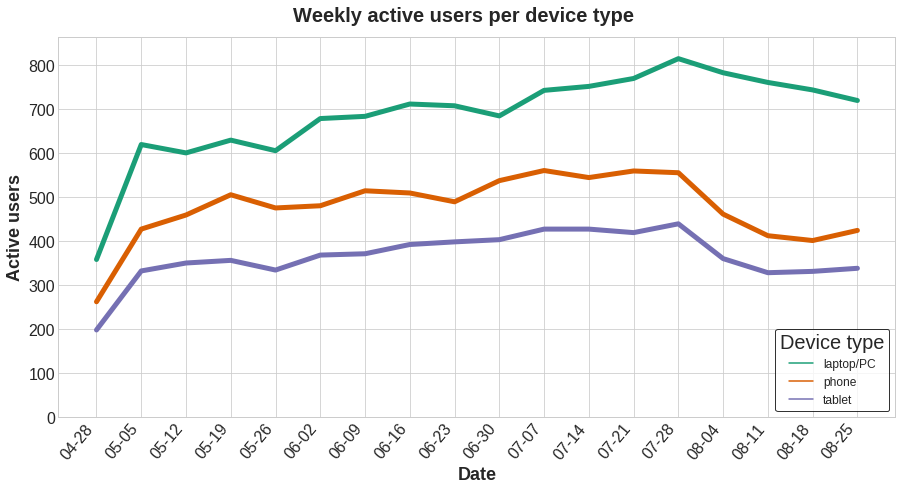

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Weekly active users per device type", fontsize=20, fontweight=550, y=0.94)  
    
    ax=sns.lineplot(x="week", y="active_users", data=device_1, hue="device_type", palette="Dark2", lw=5) 
    ax.set_ylim(0, device_1.active_users.max()+50)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Active users", fontsize=18, fontweight=650)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc="lower right", handles=handles[1:], labels=labels[1:], prop={'size': 12}, frameon="yes",
              edgecolor="black", title="Device type", title_fontsize=20)
    
    plt.savefig("../Figures/Weekly_active_users_per_device_type", dpi=300) 
    plt.show()

На приведенной выше диаграмме показано, что снижение вовлеченности происходит из всех источников, но особенно заметно оно для пользователей, которые вошли в систему со своих телефонов и планшетов. Вдобавок ко всему, доля пользователей ноутбуков больше, чем у других типов устройств, поэтому пропорционально падение между группами сильно различается.
Давайте посмотрим, как эти пропорции менялись с июля по август.

In [ ]:
query_model_device = """
SELECT device_type, active_users_t0, active_users, (active_users-active_users_t0) AS variation_drop,
 ROUND(CAST(((active_users::float-active_users_t0::float) / active_users_t0)*100 as numeric) ,2) AS variation_pct
FROM(
    SELECT sub3.*
    FROM(
        SELECT sub2.*, LAG(sub2.active_users, 1) OVER (PARTITION BY sub2.device_type) AS active_users_t0
        FROM(
            SELECT sub1.device_type AS device_type, EXTRACT('month' FROM occurred_at::date) AS month,
             COUNT(DISTINCT user_id) as active_users
            FROM(
                SELECT *,
                CASE WHEN device IN ('nexus 10', 'windows surface', 'nexus 7', 'kindle fire') 
                      OR device LIKE '%%pad%%' OR device ILIKE '%%tablet%%' THEN 'tablet'
                     WHEN device IN ('nexus 5', 'samsung galaxy note', 'samsung galaxy s4', 'htc one', 'nokia 635')
                      OR device LIKE '%%phone%%' THEN 'phone'
                     ELSE 'laptop/PC' END AS device_type
                FROM events
                ) sub1
            WHERE event_name = 'login'
            GROUP BY device_type, month
            ) sub2
        ) sub3
    WHERE sub3.month = 8
    ) sub4;  
"""

device_2 = pd.read_sql(query_model_device, engine)

In [ ]:
device_2.style.format({"variation_pct":"{:.2f}%"})

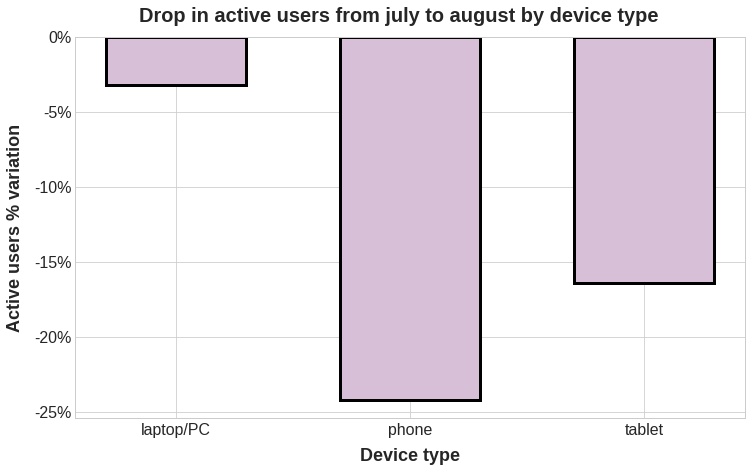

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Drop in active users from july to august by device type", fontsize=20, fontweight=650, y=0.94)
    
    ax.bar(device_2["device_type"], device_2["variation_pct"], color="thistle", width=0.6,
            edgecolor="black", linewidth=3)
    ax.tick_params(axis="x", labelsize=16, pad=5)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Device type", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Active users % variation", fontsize=18, fontweight=650, labelpad=10)
    
    ylabels = ['{:,.0f}%'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)
    
    plt.savefig("../Figures/Drop in active users from july to august by device type", dpi=300) 
    plt.show()

Разница в том, как тип устройства связан с изменением вовлеченности пользователей, достаточно велика, чтобы включить это в список вероятной причины, объясняющей снижение вовлеченности пользователей. Это не означает, что это точно причина, но, глядя на эти данные, что-то подозрительно и заслуживает дальнейшего изучения. Например, может быть полезно поговорить с технической командой, чтобы узнать, настраивали ли они что-то в приложении (используемом через телефоны и планшеты, а не через ПК/ноутбуки), чтобы выяснить потенциальную проблему в их разработках.

#### Operative system

Аналогично тому, как показано выше для типа устройства, анализ также может быть разбит по операционной системе (которая, кстати, в определенной степени коррелирует с типом устройства).

In [ ]:
query_operative_system = """
SELECT sub1.device_os AS device_os,
 SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week,
 COUNT(DISTINCT user_id) as active_users
FROM(
    SELECT *,
    CASE WHEN device LIKE 'i%%' OR device ILIKE '%%mac%%' THEN 'apple'
     WHEN device LIKE '%%nexus%%' OR device LIKE '%%galaxy%%' OR device LIKE '%%nokia%%'
      OR device LIKE '%%HTC%%' OR device LIKE '%%fire%%' THEN 'android'
     ELSE 'windows' END AS device_os
    FROM events
    ) sub1
WHERE event_name = 'login'
GROUP BY device_os, week
ORDER BY week, device_os; 
"""

operative_system_1 = pd.read_sql(query_operative_system, engine)

In [ ]:
operative_system_1.head(10)

device_os   week  active_users
0   android  04-28           174
1     apple  04-28           376
2   windows  04-28           246
3   android  05-05           284
4     apple  05-05           601
5   windows  05-05           426
6   android  05-12           300
7     apple  05-12           638
8   windows  05-12           430
9   android  05-19           311

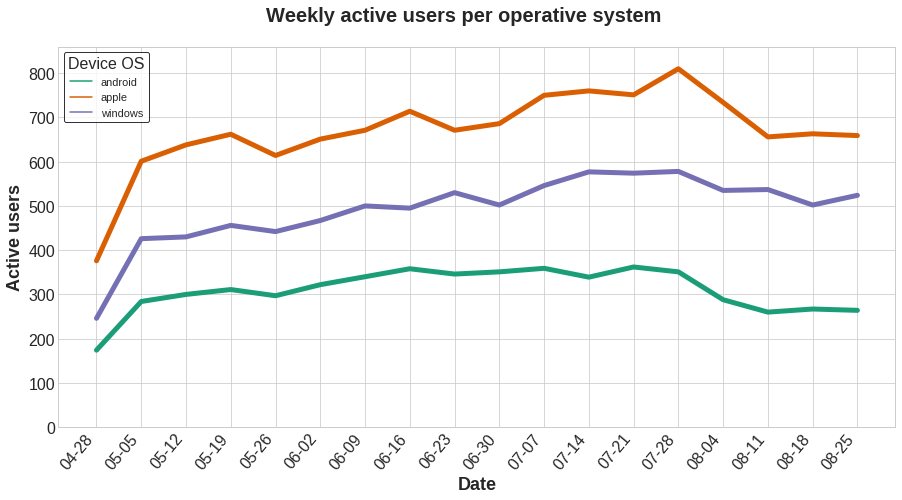

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Weekly active users per operative system", fontsize=20, fontweight=650, y=0.96)  
    
    ax=sns.lineplot(x="week", y="active_users", data=operative_system_1, hue="device_os", palette="Dark2", lw=5) 
    ax.set_ylim(0, operative_system_1.active_users.max()+50)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Active users", fontsize=18, fontweight=650)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc="upper left", handles=handles[1:], labels=labels[1:], prop={'size': 11}, frameon="yes",
              edgecolor="black", title="Device OS", title_fontsize=16)
        
    plt.savefig("../Figures/Weekly active users per operative system", dpi=300) 
    plt.show()

Приведенный выше график показывает нам, что падение, по-видимому, в основном исходит от пользователей Apple и Android, и это в определенной степени связано с предыдущими графиками, где мы наблюдали эффект типа устройства.
Давайте поймем относительную величину этого последствия, взглянув на пропорциональное изменение с июля по август для каждой операционной системы.

In [ ]:
query_operative_system = """
SELECT device_os, active_users_t0, active_users, (active_users-active_users_t0) AS variation_drop,
 ROUND(CAST(((active_users::float-active_users_t0::float) / active_users_t0)*100 as numeric) ,2) AS variation_pct
FROM(
    SELECT sub3.*
    FROM(
        SELECT sub2.*, LAG(sub2.active_users, 1) OVER (PARTITION BY sub2.device_os) AS active_users_t0
        FROM(
            SELECT sub1.device_os AS device_os, EXTRACT('month' FROM occurred_at::date) AS month,
             COUNT(DISTINCT user_id) as active_users
            FROM(
                SELECT *,
                CASE WHEN device LIKE 'i%%' OR device ILIKE '%%mac%%' THEN 'apple'
                     WHEN device LIKE '%%nexus%%' OR device LIKE '%%galaxy%%' OR device LIKE '%%nokia%%'
                      OR device LIKE '%%HTC%%' OR device LIKE '%%fire%%' THEN 'android'
                     ELSE 'windows' END AS device_os
                FROM events
                ) sub1
            WHERE event_name = 'login'
            GROUP BY device_os, month
            ) sub2
        ) sub3
    WHERE sub3.month = 8
    ) sub4;
"""

operative_system_2 = pd.read_sql(query_operative_system, engine)

In [ ]:
operative_system_2.stylem.format({"variation_pct":"{:.2f}%"})

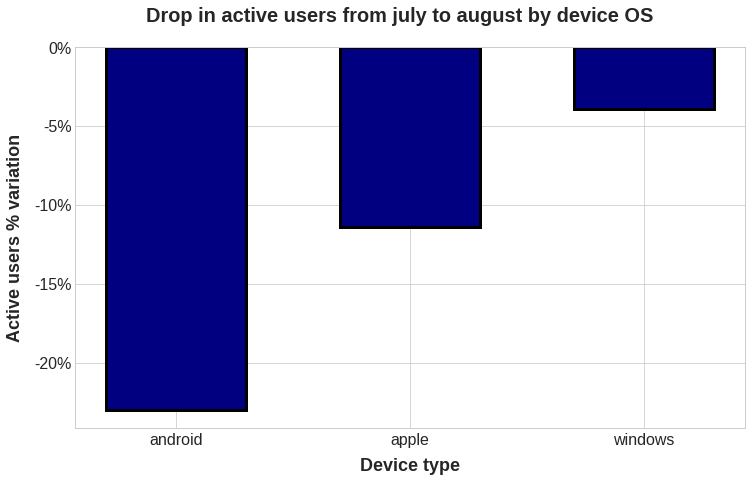

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Drop in active users from july to august by device OS",
                 fontsize=20, fontweight=650, y=0.96)
    
    ax.bar(operative_system_2["device_os"], operative_system_2["variation_pct"], color="navy", width=0.6,
        edgecolor="black", linewidth=3)
    ax.tick_params(axis="x", labelsize=16, pad=5)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Device type", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Active users % variation", fontsize=18, fontweight=650, labelpad=10)
    
    ylabels = ['{:,.0f}%'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)

    plt.savefig("../Figures/Drop in active users from july to august by device OS", dpi=300) 
    plt.show()

В соответствии с тем, что было обнаружено ранее, телефоны и планшеты, по-видимому, аккумулируют большую долю снижения вовлеченности пользователей, и, как показано на этом последнем графике, особенно устройства Android.

Однако, если это был единственный источник проблемы, почему тогда ноутбуки с окнами наблюдают падение, хотя и менее заметное, но все же падение вовлеченности пользователей?

Давайте продолжим исследовать другие возможные причины.

### Sign-up feature flow

Сначала удобно проверять новых пользователей за месяц.

In [ ]:
query_signup_flow = """
SELECT DISTINCT state
FROM users;
"""
signup_flow_0 = pd.read_sql(query_signup_flow, engine)

In [ ]:
signup_flow_0.head()

state
0  pending
1   active

In [ ]:
query_signup_flow = """
SELECT sub2.*, 
 ROUND(CAST(((monthly_new_users::float-lag::float) / lag)*100 as numeric) ,2) AS new_users_variation_pct
FROM(
    SELECT sub1.*,
     LAG(sub1.monthly_new_users, 1) OVER () AS lag
    FROM(
        SELECT LEFT((DATE_TRUNC('month', created_at::date)::text), 7) AS month, 
         COUNT(DISTINCT user_id) AS monthly_new_users
        FROM users
        WHERE state='active'
        GROUP BY month
        )sub1
    )sub2;
"""
signup_flow_1= pd.read_sql(query_signup_flow, engine)

In [ ]:
signup_flow_1

month  monthly_new_users    lag  new_users_variation_pct
0   2013-01                160    NaN                      NaN
1   2013-02                160  160.0                     0.00
2   2013-03                150  160.0                    -6.25
3   2013-04                181  150.0                    20.67
4   2013-05                214  181.0                    18.23
5   2013-06                213  214.0                    -0.47
6   2013-07                284  213.0                    33.33
7   2013-08                316  284.0                    11.27
8   2013-09                330  316.0                     4.43
9   2013-10                390  330.0                    18.18
10  2013-11                399  390.0                     2.31
11  2013-12                486  399.0                    21.80
12  2014-01                552  486.0                    13.58
13  2014-02                525  552.0                    -4.89
14  2014-03                615  525.0                    17.14
15  2014-04                726  615.0                    18.05
16  2014-05                779  726.0                     7.30
17  2014-06                873  779.0                    12.07
18  2014-07                997  873.0                    14.20
19  2014-08               1031  997.0                     3.41

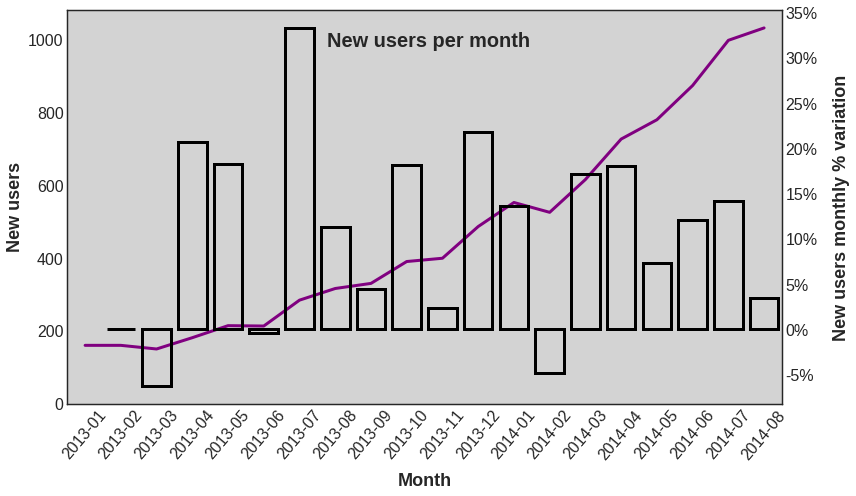

In [ ]:
with plt.style.context('seaborn-white'):
    fig, ax1 = plt.subplots(figsize=(12,7))
    fig.suptitle("New users per month", fontsize=20, fontweight=650, y=0.93) 
    ax2 = ax1.twinx()

    sns.lineplot(signup_flow_1["month"], signup_flow_1["monthly_new_users"], lw=3, color="purple", ax=ax1)
    ax1.set_ylim(0, signup_flow_1.monthly_new_users.max()+50)
    ax1.tick_params(axis="x", labelsize=16, rotation=50)
    ax1.tick_params(axis="y", labelsize=16)
    ax1.set_xlabel("Month", fontsize=18, fontweight=650, labelpad=10)
    ax1.set_ylabel("New users", fontsize=18, fontweight=650)
    
    sns.barplot(signup_flow_1["month"], signup_flow_1["new_users_variation_pct"], facecolor=(0, 0, 0, 0),
        edgecolor="black", linewidth=3, ax=ax2)
    ax2.tick_params(axis="x", labelsize=16, pad=10)
    ax2.tick_params(axis="y", labelsize=16)
    ax2.set_xlabel("Device type", fontsize=18, fontweight=650, labelpad=10)
    ax2.set_ylabel("New users monthly % variation", fontsize=18, fontweight=650, labelpad=15)
    
    ylabels = ['{:,.0f}%'.format(x) for x in ax2.get_yticks()]
    ax2.set_yticklabels(ylabels)
    
    ax1.set_facecolor("lightgrey")
    
    plt.tight_layout()
    plt.savefig("../Figures/New users per month", dpi=300)
    plt.show()

Фиолетовая линия показывает эволюцию новых пользователей в месяц и связана с левой осью Y, а столбцы показывают ежемесячное изменение количества новых пользователей в %, которое связано с правой осью Y.

Читая диаграмму, мы видим, что существует четкая тенденция к увеличению числа пользователей в период с 2013 по 2014 год. В частности, если мы обратим внимание на последнее лето (где сосредоточен анализ падения вовлеченности пользователей), то в августе (2014 г.) число новых пользователей действительно увеличилось по сравнению с июлем (2014 г.). Одного этого было бы достаточно, чтобы отбросить проблему в процессе регистрации как одну из причин нашей проблемы.

Однако, поскольку в августе темпы роста числа привлеченных пользователей явно замедлились, можно с уверенностью более внимательно изучить этапы процесса регистрации.

In [ ]:
query_signup_flow = """
SELECT sub.*
FROM(
    SELECT LEFT(((DATE_TRUNC('month', users.created_at::date) + INTERVAL '1 day')::text), 7)
     AS activation_month,
     COUNT(DISTINCT CASE WHEN events.event_name = 'create_user' THEN events.user_id ELSE null END)
     AS user_created_count,
     COUNT(DISTINCT CASE WHEN events.event_name = 'enter_email' THEN events.user_id ELSE null END)
     AS enter_email_count,
     COUNT(DISTINCT CASE WHEN events.event_name = 'enter_info' THEN events.user_id ELSE null END)
     AS enter_info_count,
     COUNT(DISTINCT CASE WHEN events.event_name = 'complete_signup' THEN events.user_id ELSE null END)
     AS complete_signup_count
    FROM events
    JOIN users
    ON users.user_id = events.user_id
    AND users.created_at >= '2014-05-01 00:00:00'
    GROUP BY activation_month
    )sub
WHERE activation_month > '2014-04-30 23:59:59';
"""

signup_flow_2 = pd.read_sql(query_signup_flow, engine)

In [ ]:
signup_flow_2.head()

activation_month  user_created_count  enter_email_count  enter_info_count  \
0          2014-05                1597                955               825   
1          2014-06                1728               1067               925   
2          2014-07                1983               1189              1043   
3          2014-08                1990               1196              1079   

   complete_signup_count  
0                    779  
1                    873  
2                    997  
3                   1031

In [ ]:
signup_flow_2.columns

Index(['activation_month', 'user_created_count', 'enter_email_count',
       'enter_info_count', 'complete_signup_count'],
      dtype='object')

In [ ]:
fig = go.Figure(go.Funnel(
    y = ['user_created_count', 'enter_email_count', 'enter_info_count', 'complete_signup_count'],
    x = signup_flow_2.loc[0,['user_created_count', 'enter_email_count', 'enter_info_count', 'complete_signup_count']],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["darkgreen", "seagreen", "palegreen", "greenyellow"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.update_layout(title="Signup flow funnel")

fig.show()

И снято за несколько месяцев до августа (включительно).

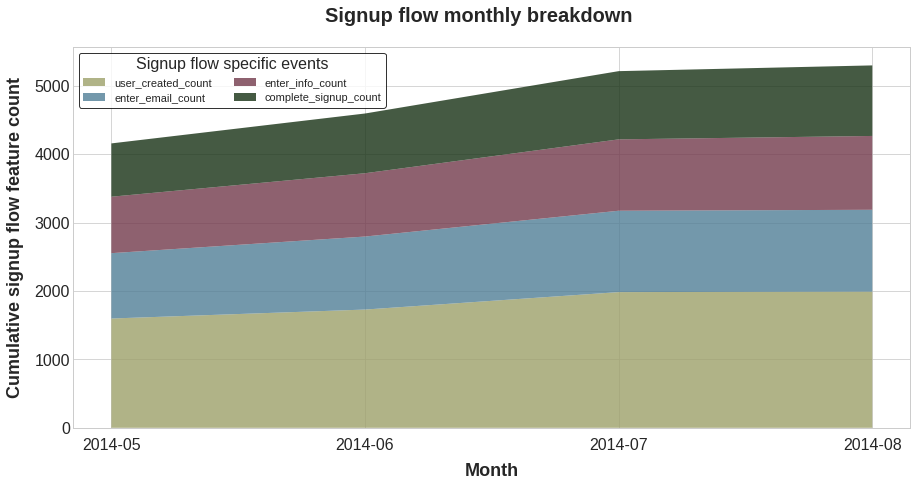

In [ ]:
y = [signup_flow_2.user_created_count.tolist(), signup_flow_2.enter_email_count.tolist(),
     signup_flow_2.enter_info_count.tolist(), signup_flow_2.complete_signup_count.tolist()]

pal = sns.cubehelix_palette(4, rot=-2.5, light=0.6)

with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Signup flow monthly breakdown", fontsize=20, fontweight=650, y=0.96)  
    
    plt.stackplot(signup_flow_2["activation_month"], y, labels=signup_flow_2.columns[1:5], lw=3.5,
    colors=pal, alpha=0.8)
    ax.tick_params(axis="x", labelsize=16, pad=10)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Month", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Cumulative signup flow feature count", fontsize=18, fontweight=650, labelpad=10)

    ax.legend(loc="upper left", prop={'size': 11}, frameon="yes", edgecolor="black",
              title="Signup flow specific events", title_fontsize=16, ncol=2)

    plt.savefig("../Figures/Signup flow monthly breakdown", dpi=300) 
    plt.show()

Как мы видим, все этапы воронки процесса регистрации сохраняют свои пропорции относительно друг друга в разные месяцы, поэтому мы можем с уверенностью исключить техническую проблему в этом потоке как основную причину нашей проблемы.

### Broken tracking logs

Возможно, какая-то конкретная функция в потоке использования не может быть отслежена из-за проблем с журналами (идентификаторы для каждого отдельного действия, предпринятого пользователями при взаимодействии с продуктом).

In [ ]:
query_usage_flow = """
SELECT SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week, event_name,
 COUNT(user_id) AS event_count
FROM events
WHERE event_type = 'engagement'AND event_name NOT LIKE '%%result%%'
GROUP BY week, event_name
ORDER BY week;
"""

usage_flow = pd.read_sql(query_usage_flow, engine)

In [ ]:
usage_flow.head(10)

week           event_name  event_count
0  04-28            home_page         2546
1  04-28         like_message         1657
2  04-28                login          967
3  04-28  search_autocomplete          424
4  04-28           search_run          358
5  04-28         send_message          904
6  04-28           view_inbox         1510
7  05-05            home_page         5113
8  05-05         like_message         3382
9  05-05                login         1999

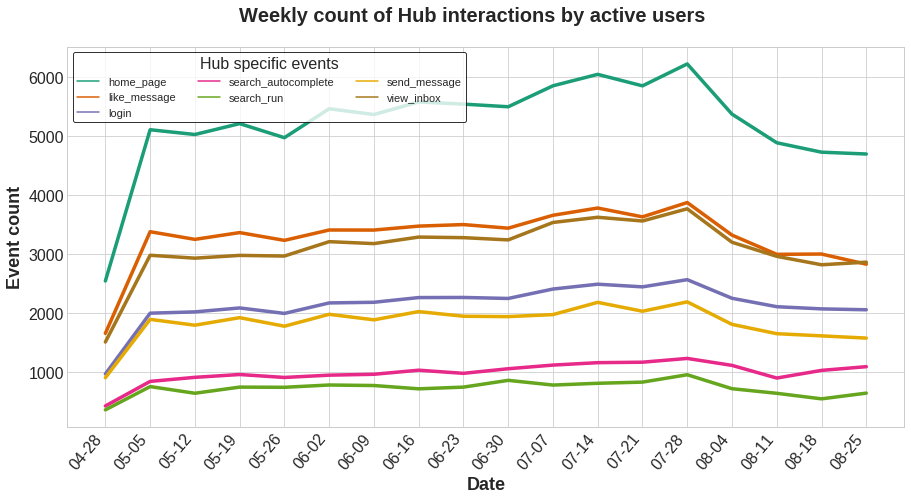

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Weekly count of Hub interactions by active users", fontsize=20, fontweight=650, y=0.96)  
    
    ax=sns.lineplot(x="week", y="event_count", data=usage_flow, hue="event_name", palette="Dark2", lw=3.5) 
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Event count", fontsize=18, fontweight=650)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc="upper left", handles=handles[1:], labels=labels[1:], prop={'size': 11}, frameon="yes",
              edgecolor="black", title="Hub specific events", title_fontsize=16, ncol=3)
    
    plt.savefig("../Figures/Weekly count of product interactions by active users", dpi=300) 
    plt.show()

Это не так. Существует общее падение всех событий до такой степени, что кажется, что они движутся синхронно. Давайте приблизим июль-август и посмотрим на него в относительных пропорциях.

In [ ]:
query_usage_flow = """
SELECT event_name, event_count_t0, event_count, (event_count-event_count_t0) AS variation_drop,
 ROUND(CAST(((event_count::float-event_count_t0::float) / event_count_t0)*100 as numeric) ,2) AS variation_pct
FROM(
    SELECT sub2.*
    FROM(
        SELECT sub.*, LAG(sub.event_count, 1) OVER (PARTITION BY sub.event_name ORDER BY sub.month)
        AS event_count_t0
        FROM(
            SELECT EXTRACT('month' FROM occurred_at::date) AS month, event_name,
             COUNT(user_id) AS event_count
            FROM events
            WHERE event_type = 'engagement' AND event_name NOT LIKE '%%result%%'
            GROUP BY month, event_name
            ) sub
        ) sub2
    WHERE sub2.month = 8
    ) sub3;
"""
usage_flow_2 = pd.read_sql(query_usage_flow, engine)

In [ ]:
usage_flow_2.style.format({"variation_pct":"{:.2f}%"})

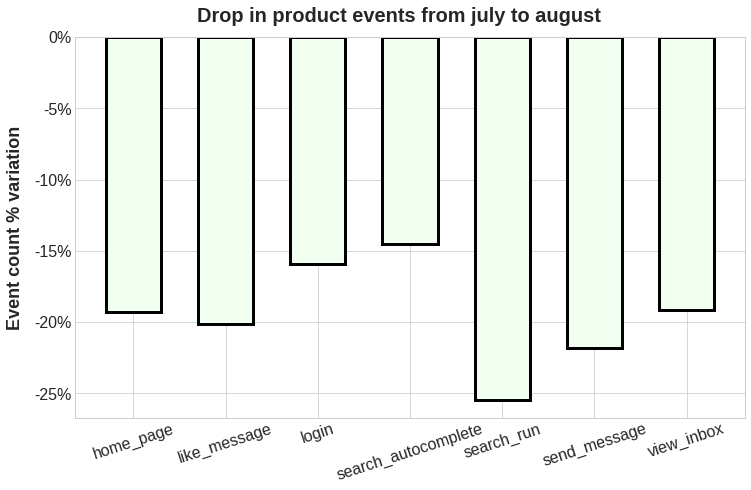

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Drop in product events from july to august",
                 fontsize=20, fontweight=650, y=0.94)
    
    ax.bar(usage_flow_2["event_name"], usage_flow_2["variation_pct"], color="honeydew", width=0.6,
        edgecolor="black", linewidth=3)
    ax.tick_params(axis="x", labelsize=16, rotation=18)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_ylabel("Event count % variation", fontsize=18, fontweight=650, labelpad=10)
    
    ylabels = ['{:,.0f}%'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)

    plt.savefig("../Figures/Drop in product events from july to august", dpi=300)
    plt.show()

Действительно, есть некоторые различия в том, как происходит падение вовлеченности через них, но они не кажутся слишком важными, чтобы считать, что журналы отслеживания, принадлежащие любому из них, в частности, повреждены.

### Bad data. QA/bots

Чтобы установить, является ли это причиной, нам нужно увидеть активность пользователя и проверить, есть ли необычная активность некоторых из них. Это вызвало бы искусственную активность или, другими словами, определенный всплеск/необычный рост, который в нашем случае мог бы иметь смысл в июле. Если бы это было правдой, мы могли бы сказать, что августовское падение активности пользователей таковым не является, потому что это скорее проблема фиктивной активности пользователей в предыдущем месяце.

Во-первых, давайте проверим, есть ли кто-то, кто начинает взаимодействовать с сетью, но не входит в систему, это может указывать на что-то странное, например, на кого-то, кому не нужно регистрироваться, чтобы быть частью журналов записей (поведение, подобное ботам).

In [ ]:
query_bad_data = """
SELECT sub2.*
FROM(
    SELECT sub.*, ROW_NUMBER() OVER (PARTITION BY user_id, day ORDER BY occurred_at::date) AS user_events_per_day
    FROM(
        SELECT *, DATE_TRUNC('day', occurred_at::date) AS day
        FROM events
        WHERE event_type = 'engagement'
        ) sub
    ) sub2
WHERE user_events_per_day = 1 AND event_name != 'login' 
 AND EXTRACT('hour' FROM occurred_at::date)!=0; -- Taking those at 12am that were logged minutes before but in the previous day.
"""
qa_bots = pd.read_sql(query_bad_data, engine)

In [ ]:
qa_bots

Empty DataFrame
Columns: [user_id, occurred_at, event_type, event_name, location, device, user_type, day, user_events_per_day]
Index: []

That means that every single record of product interaction comes after a login.

Second, let’s see if there are some days within the week with unusual activity.

In [ ]:
query_bad_data = """
SELECT LEFT(sub2.day::text, 10) AS day, SUM(sub2.number_events_per_day_per_head) as number_events_per_day
FROM(
    SELECT user_id, sub.day, COUNT(event_name) AS number_events_per_day_per_head
    FROM(
        SELECT *, DATE_TRUNC('day', occurred_at::date) AS day
        FROM events
        WHERE event_type = 'engagement'
        ) sub
    GROUP BY user_id, day
    ORDER BY number_events_per_day_per_head DESC
     ) sub2  
GROUP BY day
ORDER BY day;
"""
qa_bots_2 = pd.read_sql(query_bad_data, engine)

In [ ]:
qa_bots_2.head()

day  number_events_per_day
0  2014-05-01                 2874.0
1  2014-05-02                 3854.0
2  2014-05-03                 1291.0
3  2014-05-04                  690.0
4  2014-05-05                 2583.0

In [ ]:
qa_bots_2=qa_bots_2.rename(columns={"day":"date"})
qa_bots_2["day"] = qa_bots_2["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
qa_bots_2.drop("date", inplace=True, axis=1)

In [ ]:
column_order = ["day","number_events_per_day"]

In [ ]:
qa_bots_2 = qa_bots_2[column_order]

In [ ]:
qa_bots_2.head()

day  number_events_per_day
0  2014-05-01                 2874.0
1  2014-05-02                 3854.0
2  2014-05-03                 1291.0
3  2014-05-04                  690.0
4  2014-05-05                 2583.0

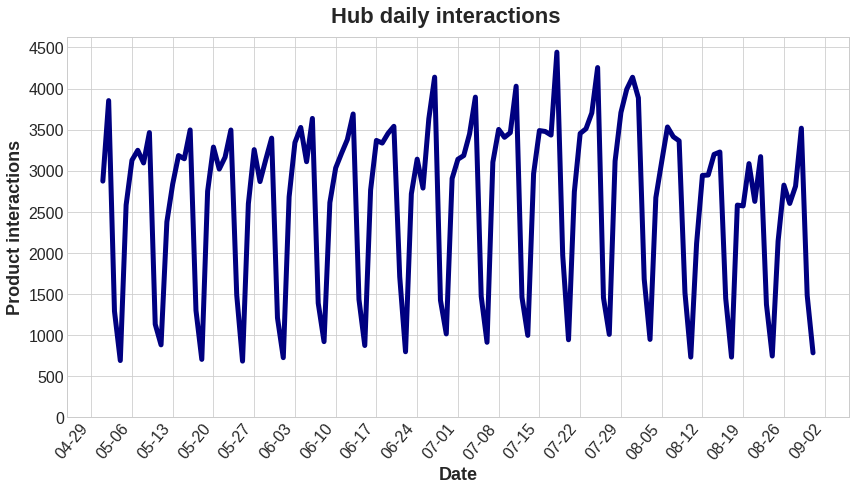

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(14,7))
    fig.suptitle("Hub daily interactions", fontsize=22, fontweight=650, y=0.94)
    
    sns.lineplot(qa_bots_2["day"], qa_bots_2["number_events_per_day"], lw=5, color="navy")
    ax.set_ylim(0,)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    plt.yticks(np.arange(0, 5000, step=500))
    
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Product interactions", fontsize=18, fontweight=650)
    
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')
    
    plt.savefig("../Figures/Hub daily interactions", dpi=300) 
    plt.show()

Мы видим систематические колебания внутри недели, когда в будние дни наблюдается больше активности в хабе, а в выходные, естественно, меньше, и, возможно, наиболее важным является пик во второй половине июля, который, хотя и не кажется чрезвычайно высоким, он не может быть исключен небрежно, поэтому стоит копнуть глубже.

И, в-третьих, также может быть полезно проверить, был ли какой-то день в течение периода времени, за который имеются данные журнала событий, с чрезвычайно необычной активностью.

In [ ]:
query_bad_data = """
SELECT user_id, sub.day, COUNT(event_name) AS number_events_per_day_per_user
FROM(
    SELECT *, DATE_TRUNC('day', occurred_at::date) AS day
    FROM events
    WHERE event_type = 'engagement'
    ) sub
WHERE day >= '2014-05-01 00:00:00+00:00'
GROUP BY user_id, day
ORDER BY number_events_per_day_per_user DESC;
"""
qa_bots_3 = pd.read_sql(query_bad_data, engine)

In [ ]:
qa_bots_3["ranking"] = (range(1, len(qa_bots_3)+1))

In [ ]:
qa_bots_3.head()

user_id                       day  number_events_per_day_per_user  ranking
0   3390.0 2014-07-28 22:00:00+00:00                              71        1
1  10766.0 2014-06-26 22:00:00+00:00                              69        2
2    719.0 2014-08-14 22:00:00+00:00                              69        3
3  14958.0 2014-07-24 22:00:00+00:00                              68        4
4   9466.0 2014-07-01 22:00:00+00:00                              66        5

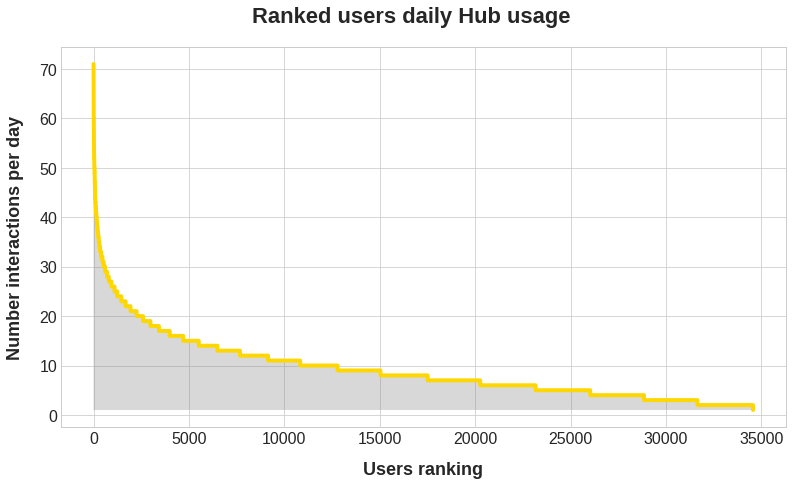

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(13,7))
    fig.suptitle("Ranked users daily Hub usage", fontsize=22, fontweight=650, y=0.96)
    
    plt.plot(qa_bots_3["ranking"], qa_bots_3["number_events_per_day_per_user"], lw=4, color="gold")
    plt.fill_between(qa_bots_3["ranking"], qa_bots_3["number_events_per_day_per_user"].min(),
                     qa_bots_3["number_events_per_day_per_user"], facecolor='gray', alpha=0.3)
    
    ax.tick_params(axis="x", labelsize=16)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Users ranking", fontsize=18, fontweight=650, labelpad=15)
    ax.set_ylabel("Number interactions per day", fontsize=18, fontweight=650, labelpad=15)
    
    plt.savefig("../Figures/Ranked users daily Hub usage", dpi=300) 
    plt.show()


Кажется, действительно бывают дни с необычной активностью, но трудно сказать, что это что-то необычное. Если бы за изменением вовлеченности пользователей с июля по август стояли неверные данные, мы бы ожидали, что они будут сконцентрированы в июле. Давай выясним.

Поскольку мне может показаться, что речь идет о необычной активности, до 70 событий в течение определенного дня и от одного пользователя, давайте рассмотрим наличие выбросов, фейковых или нет, но выбросов.

Чтобы охарактеризовать выброс, нам нужно определить порог из межквантильного диапазона (IQR) наших данных. Вот мой способ сделать это.

Сначала мы получаем IQR.

In [ ]:
stats = qa_bots_3.number_events_per_day_per_user.describe().to_frame().transpose()
stats["IQR"] = stats["75%"] - stats["25%"]
stats

count      mean      std  min  25%  50%  \
number_events_per_day_per_user  34561.0  9.221406  6.74457  1.0  5.0  8.0   

                                 75%   max  IQR  
number_events_per_day_per_user  12.0  71.0  7.0

And then it can be used to isolate the outliers.

In [ ]:
outliers_qa_bots = pd.DataFrame(columns=qa_bots_3.columns)

iqr = stats.at["number_events_per_day_per_user","IQR"]
cutoff = iqr * 3
upper = stats.at["number_events_per_day_per_user","75%"] + cutoff
results = qa_bots_3[(qa_bots_3["number_events_per_day_per_user"] > upper)].copy()
outliers_qa_bots = outliers_qa_bots.append(results)

In [ ]:
outliers_qa_bots["month"] = outliers_qa_bots["day"].apply(lambda x: x.strftime("%Y-%m"))

In [ ]:
outliers_qa_bots.head()

user_id                        day number_events_per_day_per_user ranking  \
0   3390.0  2014-07-28 22:00:00+00:00                             71       1   
1  10766.0  2014-06-26 22:00:00+00:00                             69       2   
2    719.0  2014-08-14 22:00:00+00:00                             69       3   
3  14958.0  2014-07-24 22:00:00+00:00                             68       4   
4   9466.0  2014-07-01 22:00:00+00:00                             66       5   

     month  
0  2014-07  
1  2014-06  
2  2014-08  
3  2014-07  
4  2014-07

In [ ]:
outliers_qa_bots_group = outliers_qa_bots.groupby("month")["number_events_per_day_per_user"].sum().reset_index()

In [ ]:
outliers_qa_bots_group=outliers_qa_bots_group.rename(columns={"number_events_per_day_per_user":"number_events"})
outliers_qa_bots_group

month  number_events
0  2014-05           3716
1  2014-06           4106
2  2014-07           4016
3  2014-08           2396

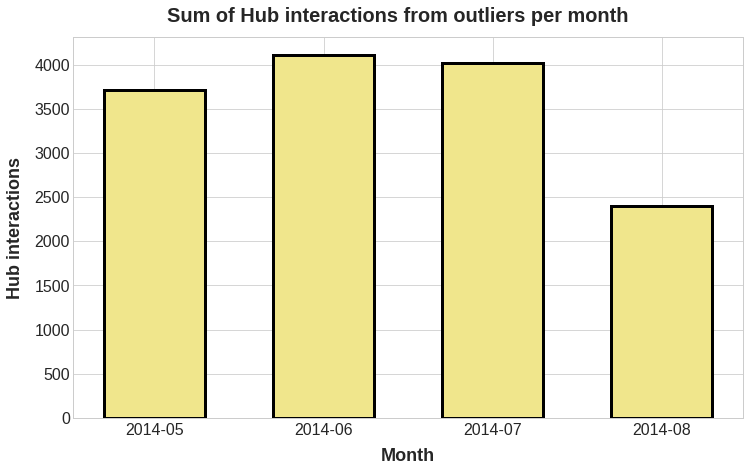

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Sum of Hub interactions from outliers per month", fontsize=20, fontweight=650, y=0.94)
    
    ax.bar(outliers_qa_bots_group["month"], outliers_qa_bots_group["number_events"], 
           color="khaki", width=0.6, edgecolor="black", linewidth=3)
    ax.tick_params(axis="x", labelsize=16, pad=5)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Month", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Hub interactions", fontsize=18, fontweight=650, labelpad=10)

    plt.savefig("../Figures/Sum of Hub interactions from outliers per month", dpi=300) 
    plt.show()

Из этой гистограммы выше можно сделать две вещи: во-первых, июль, похоже, не имеет необычайно высокой активности из-за выбросов (или потенциальных плохих / поддельных данных), на самом деле он похож на предыдущие месяцы. Во-вторых, в августе очень мало взаимодействий с аутсайдерами.

Это открывает множество сценариев, которые необходимо будет дополнительно изучить после определения приоритетов, чтобы пролить на них больше света. Среди них я бы выделил эти.

- Возможно, в августе произошли изменения в том, как поисковые системы сканируют веб-сайт, и это объясняет значительное падение в этом месяце. Одним из возможных способов дальнейшего развития может быть анализ пользовательских шаблонов и их кластеризация. Это облегчило бы идентификацию ботов, чтобы затем проверить, связано ли искомое падение вовлеченности пользователей со снижением их активности.
<br>

- Важные разработки продукта за последние месяцы, которые сопровождались интенсивной работой по обеспечению качества, завершившейся до августа. По какой-то причине данные QA попали в журналы производства и вмешиваются в метрики. Я вижу это маловероятным, но не помешает уточнить в отделе разработки продукта.
<br>

- Другие причины, объясненные в других пунктах, например, технические проблемы, которые приводят к ухудшению производительности, что заставляет наиболее активных пользователей реагировать после плохого пользовательского опыта, просто меньше вовлекаясь.


### Weekly digest emails

Как было сказано в самом начале, когда перечислялись все возможные источники проблемы, эти электронные письма — это инструмент от групп по работе с клиентами и контентом в Hub, способствующий вовлечению пользователей. Они представляют собой сводку информации, которая актуальна для каждого пользователя.

Итак, давайте посмотрим, говорят ли данные о них что-то интересное. Обычные данные были преобразованы в ключевые ставки.

In [ ]:
query_emails = """
SELECT LEFT((DATE_TRUNC('month', occurred_at::date)::text), 7) AS month, action, COUNT(action) AS number_actions
FROM emails
GROUP BY month, action
ORDER BY month, number_actions DESC;
"""
emails_1 = pd.read_sql(query_emails, engine)

In [ ]:
emails_1

month                   action  number_actions
0   2014-05       sent_weekly_digest           11730
1   2014-05               email_open            4212
2   2014-05       email_clickthrough            2023
3   2014-05  sent_reengagement_email             758
4   2014-06       sent_weekly_digest           13155
5   2014-06               email_open            4658
6   2014-06       email_clickthrough            2274
7   2014-06  sent_reengagement_email             889
8   2014-07       sent_weekly_digest           15902
9   2014-07               email_open            5611
10  2014-07       email_clickthrough            2721
11  2014-07  sent_reengagement_email             933
12  2014-08       sent_weekly_digest           16480
13  2014-08               email_open            5978
14  2014-08       email_clickthrough            1992
15  2014-08  sent_reengagement_email            1073

Presented in a pivot table format for chart consumption

In [ ]:
query_emails = """
SELECT SUBSTR(week::text, 6, 5) AS week_summary,
 ROUND(CAST((email_open::float/total_emails_sent::float) as numeric), 2) AS email_open_rate,
 ROUND(CAST((email_clickthrough::float/email_open::float) as numeric), 2) AS email_clickthrough_rate
FROM(
    SELECT sub.*, (sent_weekly_digest + sent_reengagement_email) AS total_emails_sent
    FROM(
        SELECT DATE_TRUNC('week', occurred_at::date) AS week,
         COUNT(CASE WHEN action = 'sent_weekly_digest' THEN user_id ELSE NULL END) AS sent_weekly_digest,
         COUNT(CASE WHEN action = 'sent_reengagement_email' THEN user_id ELSE NULL END) AS sent_reengagement_email,
         COUNT(CASE WHEN action = 'email_open' THEN user_id ELSE NULL END) AS email_open,
         COUNT(CASE WHEN action = 'email_clickthrough' THEN user_id ELSE NULL END) AS email_clickthrough
        FROM emails
        GROUP BY week
        ) sub
    ) sub2
ORDER BY week_summary;
"""
emails_2 = pd.read_sql(query_emails, engine)

In [ ]:
emails_2["email_open_rate"] = emails_2["email_open_rate"].apply(lambda x: x*100)
emails_2["email_clickthrough_rate"] = emails_2["email_clickthrough_rate"].apply(lambda x: x*100)

In [ ]:
emails_2.style.format({"email_open_rate":"{:.0f}%", "email_clickthrough_rate":"{:.0f}%"})

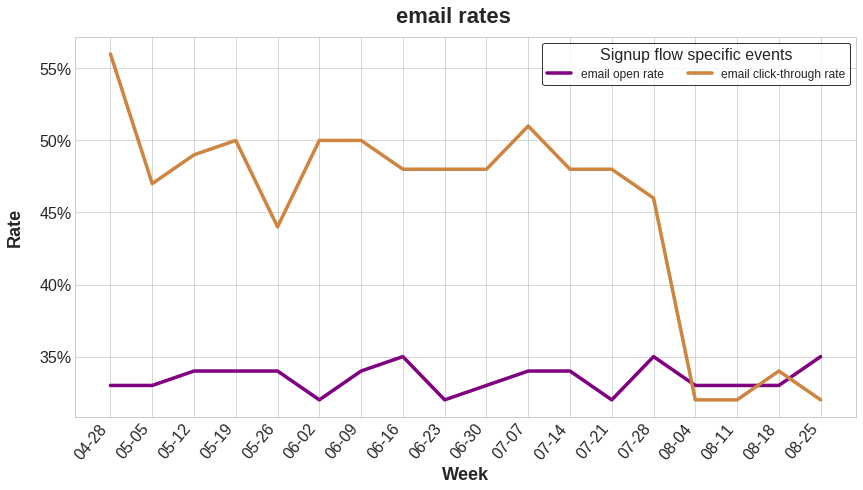

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(14,7))
    fig.suptitle("email rates", fontsize=22, fontweight=650, y=0.94)
    
    sns.lineplot(emails_2["week_summary"], emails_2["email_open_rate"], lw=3.5, color="purple")
    sns.lineplot(emails_2["week_summary"], emails_2["email_clickthrough_rate"], lw=3.5, color="peru")
    
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Week", fontsize=18, fontweight=650)
    ax.set_ylabel("Rate", fontsize=18, fontweight=650, labelpad=15)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')
        
    ylabels = ['{:,.0f}%'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)
    
    ax.legend(loc="upper right", prop={'size': 12}, frameon="yes", edgecolor="black",
              labels=['email open rate','email click-through rate'],
              title="Signup flow specific events", title_fontsize=16, ncol=2)
    plt.savefig("../Figures/email rates", dpi=300) 
    plt.show()

Действительно, что-то сразу бросается в глаза. В то время как еженедельный рейтинг открытия электронных писем с дайджестами остается постоянным в течение нескольких месяцев, мы можем ясно видеть, что рейтинг кликов падает в августе с примерно 50% до примерно 30%. То есть, 2 из 3 пользователей не очень заботятся об этих электронных письмах о вовлечении, однако из тех, кому это небезразлично, до августа 1 из 2 повторно вовлекался в продукт, переходя по ссылкам в этих электронных письмах, тогда как в августе цифра превращается в 1 пользователя из 3, повторно вовлекающихся после электронных писем. В двух словах, эффективность еженедельных дайджестов с июля по август упала на 35%, что напрямую привело к снижению вовлеченности пользователей.

Либо существует техническая проблема в самих ссылках электронной почты, не позволяющая пользователям переходить по ссылкам, либо произошли изменения в способе выбора и доставки контента, релевантного для каждого пользователя, по электронной почте (будь то с помощью алгоритма или из специализированная бригада).

## Выводы

Перечисление множества различных возможных причин, призванных объяснить падение вовлеченности пользователей, было очень полезно для уменьшения вероятности того, что мы пренебрегаем реальным источником проблемы. Затем каждый запрос позволяет нам подготовить данные для анализа. Из этого анализа следует, что что-то не так с навигацией в приложении, которая влияет на пользователей телефонов и планшетов, а также с содержанием электронных писем.

Важно отметить, что результаты не являются окончательными, вероятно, потребуются дополнительные вопросы продуктовым и техническим командам, но, по крайней мере, мы смогли получить обоснованное преимущество в поиске ответа на тревожный вопрос.